 # 1. Importing Libraries

In [1]:
import os 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.graph_objects as go


# 2.1 Data Preprocessing

In [2]:
anime_info = pd.read_csv('../input/anime-recommendation-database-2020/anime.csv')
anime_list = pd.read_csv('../input/anime-recommendation-database-2020/animelist.csv')
anime_synop = pd.read_csv('../input/anime-recommendation-database-2020/anime_with_synopsis.csv')

In [3]:
anime_info.shape,anime_list.shape,anime_synop.shape

((17562, 35), (109224747, 5), (16214, 5))

### 2.1.1  Exploring anime_info

In [4]:
anime_info.head().T

,0,1,2,3,4
MAL_ID,1,5,6,7,8
Name,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet
Score,8.78,8.39,8.24,7.27,6.98
Genres,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","Action, Drama, Mystery, Sci-Fi, Space","Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Action, Mystery, Police, Supernatural, Drama, ...","Adventure, Fantasy, Shounen, Supernatural"
English name,Cowboy Bebop,Cowboy Bebop:The Movie,Trigun,Witch Hunter Robin,Beet the Vandel Buster
Japanese name,カウボーイビバップ,カウボーイビバップ 天国の扉,トライガン,Witch Hunter ROBIN (ウイッチハンターロビン),冒険王ビィト
Type,TV,Movie,TV,TV,TV
Episodes,26,1,26,26,52
Aired,"Apr 3, 1998 to Apr 24, 1999","Sep 1, 2001","Apr 1, 1998 to Sep 30, 1998","Jul 2, 2002 to Dec 24, 2002","Sep 30, 2004 to Sep 29, 2005"
Premiered,Spring 1998,Unknown,Spring 1998,Summer 2002,Fall 2004


In [5]:
anime_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [6]:
anime_info.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


### 2.1.2   Exploring anime_list

In [7]:
anime_list.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [8]:
anime_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 4.1 GB


In [9]:
anime_list.describe()

,user_id,anime_id,rating,watching_status,watched_episodes
count,1.092247e+08,1.092247e+08,1.092247e+08,1.092247e+08,1.092247e+08
mean,1.768098e+05,1.649590e+04,4.245717e+00,3.087289e+00,1.210818e+01
std,1.018487e+05,1.379737e+04,3.912888e+00,1.774407e+00,1.463155e+02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.849100e+04,3.194000e+03,0.000000e+00,2.000000e+00,0.000000e+00
50%,1.771420e+05,1.244500e+04,5.000000e+00,2.000000e+00,3.000000e+00
75%,2.651870e+05,3.083100e+04,8.000000e+00,6.000000e+00,1.200000e+01
max,3.534040e+05,4.849200e+04,1.000000e+01,5.500000e+01,6.553500e+04


### 2.1.3   Exploring anime_synop

In [10]:
anime_synop.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


# 2.2 Checking for NAN and Duplicate values

> **Function for printing null_values and related info**

In [11]:

def description(data):
    no_rows=data.shape[0]
    types=data.dtypes
    col_null = data.columns[data.isna().any()].to_list()
    counts=data.apply(lambda x: x.count())
    uniques=data.apply(lambda x: x.unique())
    nulls=data.apply(lambda x: x.isnull().sum())
    distincts=data.apply(lambda x: x.unique().shape[0])
    nan_percent=(data.isnull().sum()/no_rows)*100
    cols={'dtypes':types, 'counts':counts, 'distincts':distincts, 'nulls':nulls,  
          'missing_percent':nan_percent, 'uniques':uniques}
    table=pd.DataFrame(data=cols)
    return table

**1. Anime_info**

In [12]:
details_tr = description(anime_info)
details_tr.reset_index(level=[0],inplace =True)
details_tr.sort_values(by='missing_percent', ascending=False)

,index,dtypes,counts,distincts,nulls,missing_percent,uniques
0,MAL_ID,int64,17562,17562,0,0.0,"[1, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22..."
26,Score-9,object,17562,3645,0,0.0,"[182126.0, 49201.0, 75651.0, 4806.0, 529.0, 14..."
20,Watching,int64,17562,3580,0,0.0,"[105808, 4143, 29113, 4300, 642, 13907, 11909,..."
21,Completed,int64,17562,7822,0,0.0,"[718161, 208333, 343492, 46165, 7314, 78349, 8..."
22,On-Hold,int64,17562,2915,0,0.0,"[71513, 1935, 25465, 5121, 766, 14228, 11901, ..."
23,Dropped,int64,17562,3035,0,0.0,"[26678, 770, 13925, 5378, 1108, 11573, 11026, ..."
24,Plan to Watch,int64,17562,7055,0,0.0,"[329800, 57964, 146918, 33719, 3394, 30202, 98..."
25,Score-10,object,17562,3379,0,0.0,"[229170.0, 30043.0, 50229.0, 2182.0, 312.0, 92..."
27,Score-8,object,17562,4515,0,0.0,"[131625.0, 49505.0, 86142.0, 10128.0, 1242.0, ..."
18,Members,int64,17562,9508,0,0.0,"[1251960, 273145, 558913, 94683, 13224, 148259..."


In [13]:
anime_info.duplicated().sum()

0

**2. Anime_list**

In [14]:
details_tr = description(anime_list)
details_tr.reset_index(level=[0],inplace =True)
details_tr.sort_values(by='missing_percent', ascending=False)

,index,dtypes,counts,distincts,nulls,missing_percent,uniques
0,user_id,int64,109224747,325770,0,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,anime_id,int64,109224747,17562,0,0.0,"[67, 6702, 242, 4898, 21, 24, 2104, 4722, 6098..."
2,rating,int64,109224747,11,0,0.0,"[9, 7, 10, 0, 8, 6, 5, 4, 3, 2, 1]"
3,watching_status,int64,109224747,9,0,0.0,"[1, 2, 3, 4, 6, 0, 5, 33, 55]"
4,watched_episodes,int64,109224747,1464,0,0.0,"[1, 4, 0, 5, 2, 29, 79, 23, 3, 40, 26, 24, 51,..."


**3. Anime_synop**

In [15]:
details_tr = description(anime_synop)
details_tr.reset_index(level=[0],inplace =True)
details_tr.sort_values(by='missing_percent', ascending=False)

,index,dtypes,counts,distincts,nulls,missing_percent,uniques
4,sypnopsis,object,16206,15222,8,0.04934,"[In the year 2071, humanity has colonized seve..."
0,MAL_ID,int64,16214,16214,0,0.00000,"[1, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22..."
1,Name,object,16214,16210,0,0.00000,"[Cowboy Bebop, Cowboy Bebop: Tengoku no Tobira..."
2,Score,object,16214,532,0,0.00000,"[8.78, 8.39, 8.24, 7.27, 6.98, 7.95, 8.06, 7.5..."
3,Genres,object,16214,4857,0,0.00000,"[Action, Adventure, Comedy, Drama, Sci-Fi, Spa..."


In [16]:
anime_synop.duplicated().sum()

0

#### As we can see from the above exploration ,only anime_synop has NAN values .We will remove them in next step

* So as we can see from above exploration ,Only Sypnopsis column has NAN Values so we will update there status as 'Unknown'

# 2.3 Removing NAN values

In [17]:
anime_synop['sypnopsis'].fillna('Unknown',inplace=True)
anime_info['Score'] = anime_info['Score'].replace('Unknown', 0).astype(float)

In [18]:
anime_synop.drop(['MAL_ID','Score','Genres'],axis = 1,inplace =True)
anime_info.rename(columns = {'MAL_ID':'anime_id'},inplace=True)

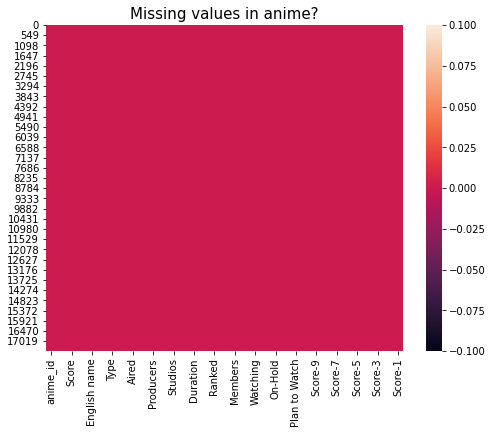

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(anime_info.isnull())
plt.title("Missing values in anime?", fontsize = 15)
plt.show()

# 3 EDA and Visualization

* #### Inorder to build a recommendation engine, we have to understand our dataset

In [20]:
edacol = ['anime_id', 'Name','English name', 'Score', 'Genres', 'Type', 'Aired', 'Premiered','Rating','Source','Episodes','Dropped'] 
eda = anime_info[edacol]
eda.set_index('anime_id',inplace=True)


* #### Top 5 animes based on Score/Rating

In [21]:
anime_info.sort_values('Score',ascending=False).head(5)

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",Winter 2021,...,173154.0,63756.0,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061.0
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,...,468504.0,275960.0,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255.0
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,...,327290.0,239451.0,110481.0,33662.0,8365.0,2974.0,1108.0,550.0,385.0,4169.0
9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,銀魂°,TV,51,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,...,78918.0,37902.0,21360.0,10215.0,3898.0,2311.0,952.0,648.0,1100.0,4508.0


In [22]:

labels = eda['Type'].value_counts().index
values = eda['Type'].value_counts().values
colors = ["ff9f1c","ffbf69","ffffff","cbf3f0","2ec4b6"]
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)],layout=go.Layout(height=600, width=800))
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Insights:

* 28.4% of the anime's were aired on TV followed by 22.2% through OVA
* 17.3% of anime's are streamed as Movie which is greater than Special(12.6%) and ONA(10.9%)

In [23]:
labels = eda['Source'].value_counts().index
values = eda['Source'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)],layout=go.Layout(height=600, width=800))
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Sources of Engagement",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Insights: The above pie chart gives a count of sources of engagement of anime



* #### Top 10 Anime based on popularity in different source (eg Original,Manga,etc)

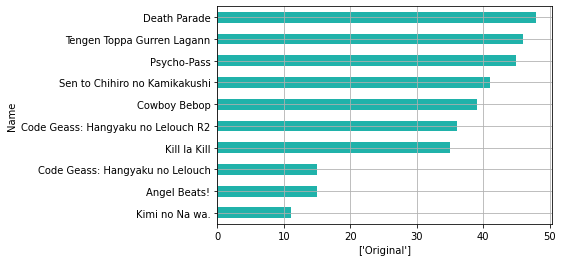

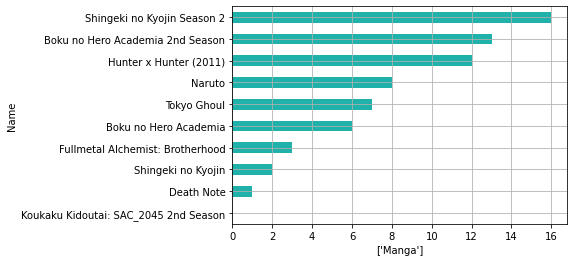

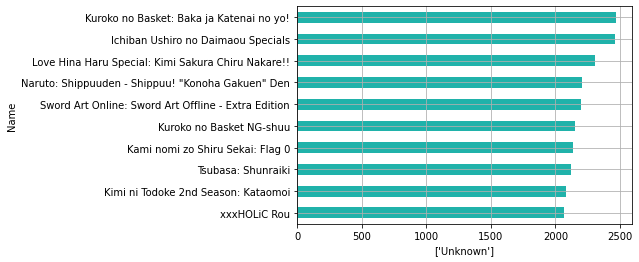

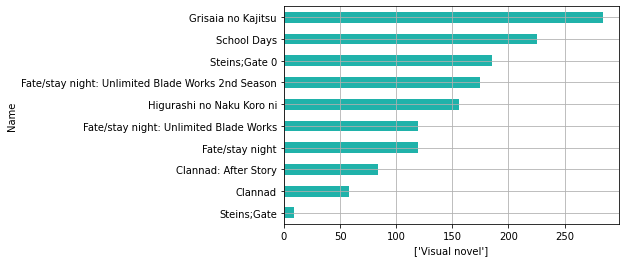

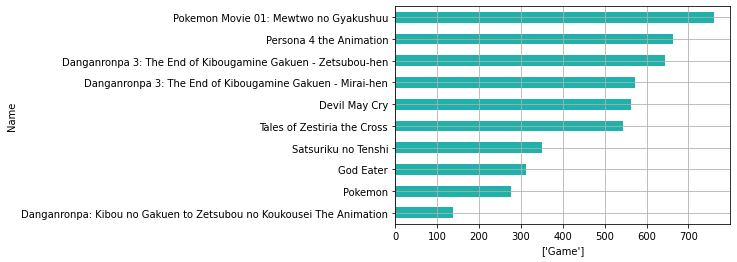

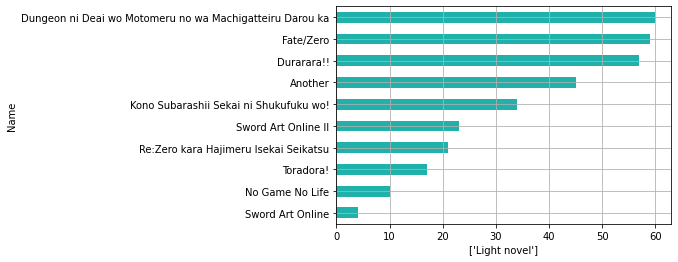

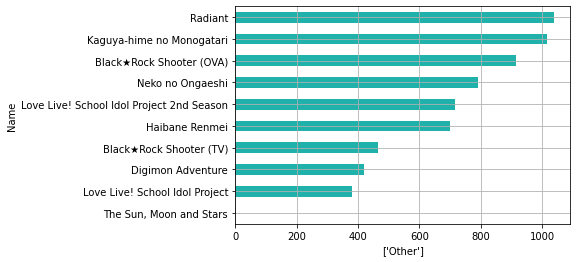

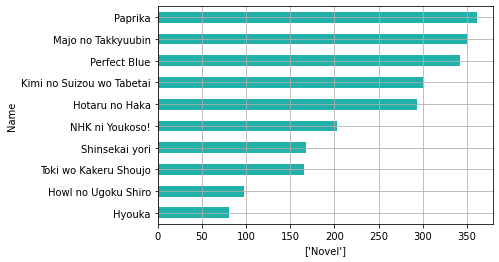

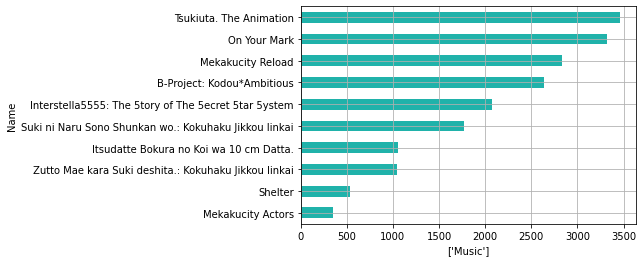

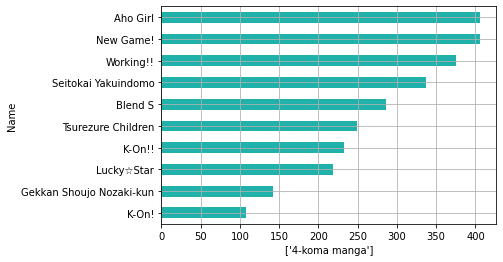

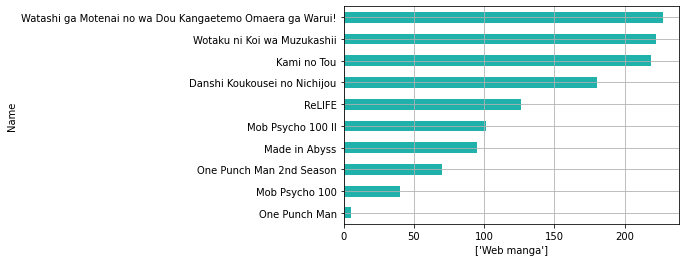

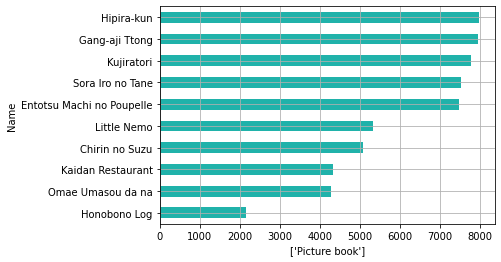

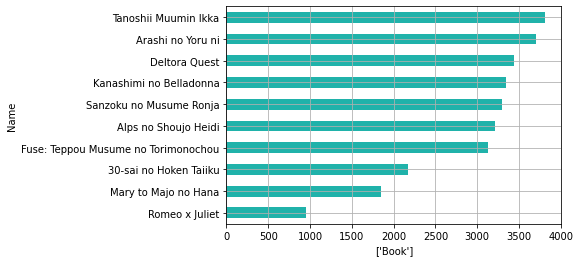

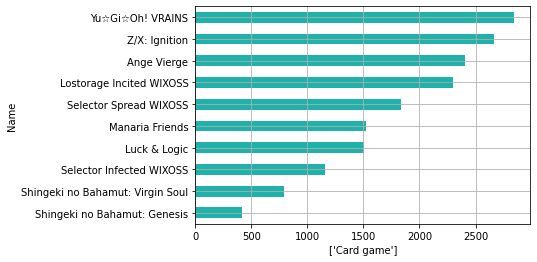

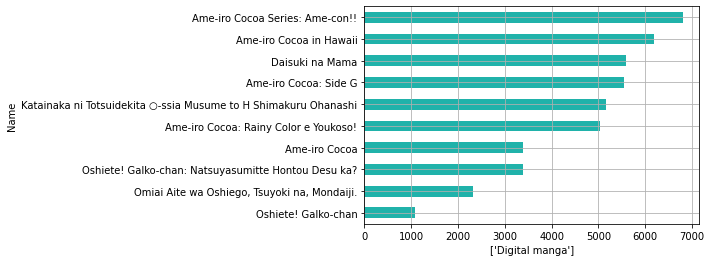

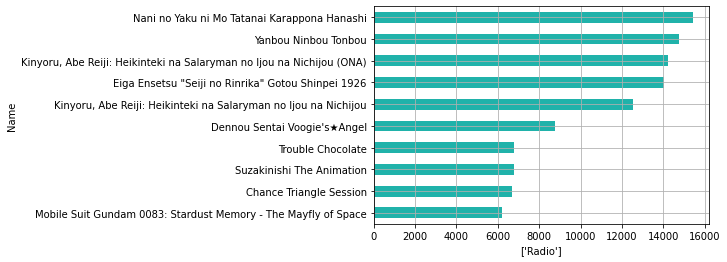

In [24]:
sour = anime_info.sort_values(by= 'Popularity').groupby('Source')[['Name','Popularity']]

for i in  eda['Source'].value_counts().index:
    bar = sour.get_group(i)
    bar.set_index('Name',inplace=True)
    bar.head(10).plot(kind='barh',legend =False,color = 'lightseagreen')
    plt.xlabel([i])
    plt.grid()
    
plt.show()

* #### Top 10 anime based on popularity in different Types

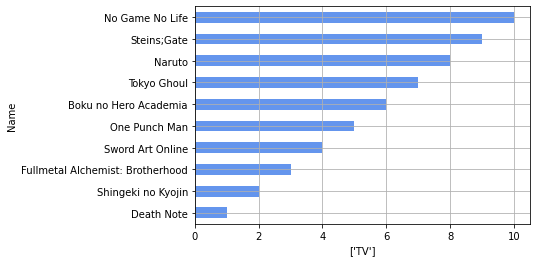

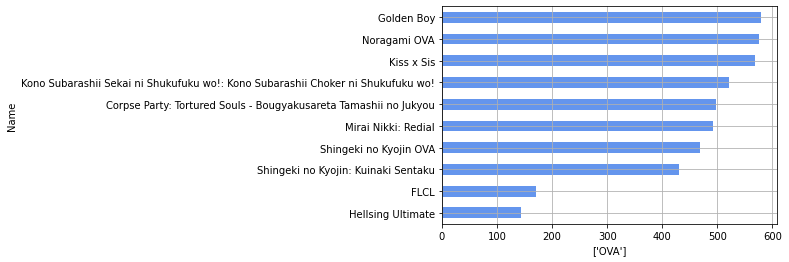

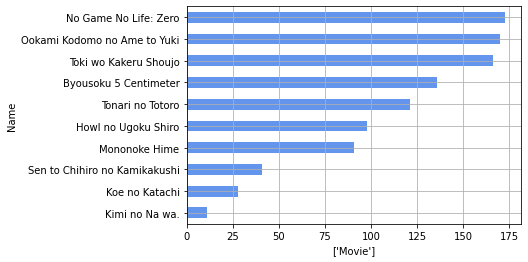

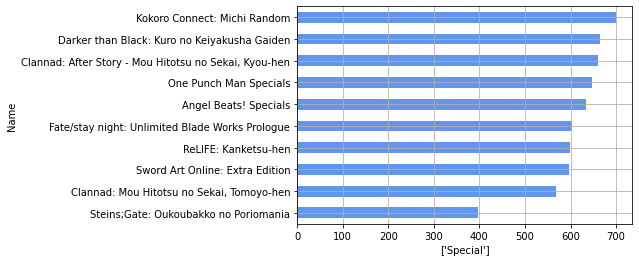

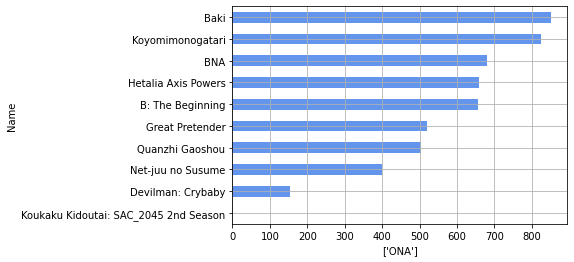

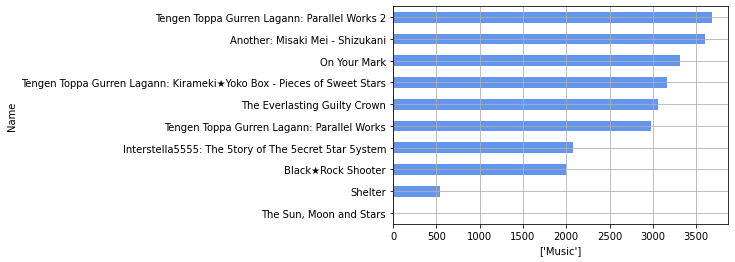

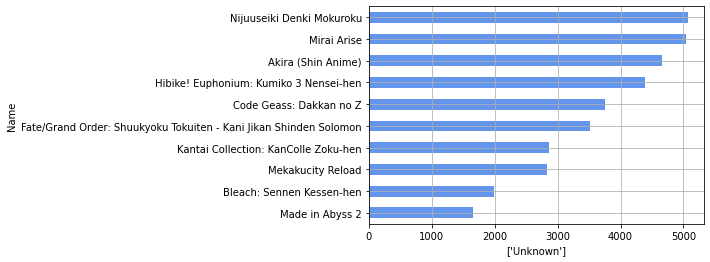

In [25]:
typ = anime_info.sort_values(by= 'Popularity').groupby('Type')[['Name','Popularity']]

for i in  eda['Type'].value_counts().index:
    bar = typ.get_group(i)
    bar.set_index('Name',inplace=True)
    bar.head(10).plot(kind='barh',legend =False,color = 'cornflowerblue')
    plt.xlabel([i])
    plt.grid()
    
plt.show()


* #### We are taking a sample of 50,000 user ratings as processing on the full dataset is memory consuming

In [26]:
df = anime_list.iloc[:18522589,:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18522589 entries, 0 to 18522588
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 706.6 MB


In [27]:
anime_fulldata=pd.merge(anime_info,df,on='anime_id')

In [28]:
anime_ratingCount = (anime_fulldata.
     groupby(by = ['Name'])['rating'].count().reset_index()[['Name', 'rating']])

* #### I'm sensing the top anime's based on their rating counts provided by the user id's

Text(0, 0.5, 'User Rating count')

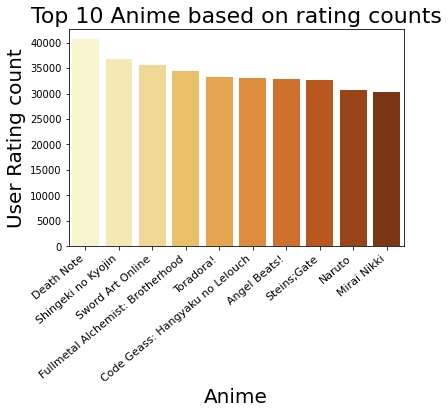

In [29]:
top10_animerating=anime_ratingCount[['Name', 'rating']].sort_values(by = 'rating',ascending = False).head(10)
ax=sns.barplot(x="Name", y="rating", data=top10_animerating, palette="YlOrBr")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

* #### Here are some animes which were dropped by many user's

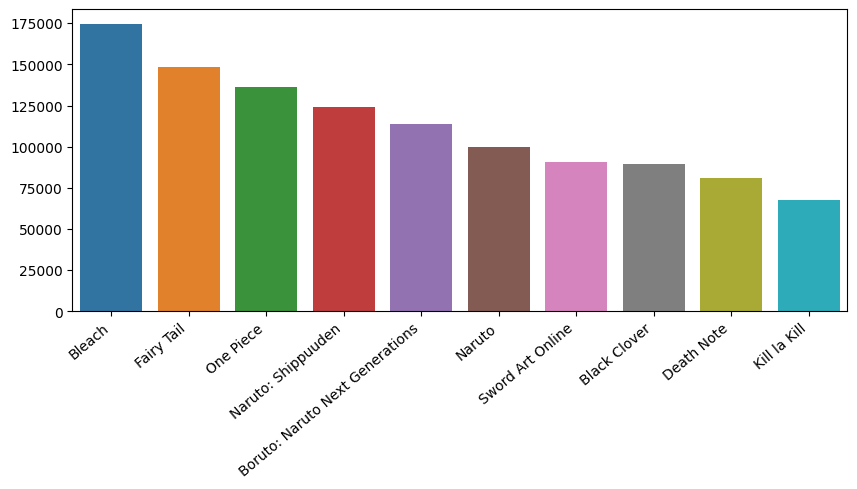

In [30]:
drop = eda[['Name','Dropped']].sort_values(by = 'Dropped',ascending =False).head(10)
plt.figure(figsize=(10,4), dpi = 100)
sns.barplot(x=drop['Name'].unique(),y=drop['Dropped'].unique(), data=drop)
plt.xticks(rotation=40, ha = 'right')
plt.show()

* #### Here we have categorized animes according to Rating and displayed there count

In [31]:
labels = eda['Rating'].value_counts().index
values = eda['Rating'].value_counts().values
colors = ["007f5f","2b9348","55a630","80b918","aacc00","bfd200","d4d700","dddf00","eeef20","ffff3f"]
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)],layout=go.Layout(height=600, width=800))
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Rating based Anime",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

* #### Here we have listed Top 10 animes based on their No. of Episodes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



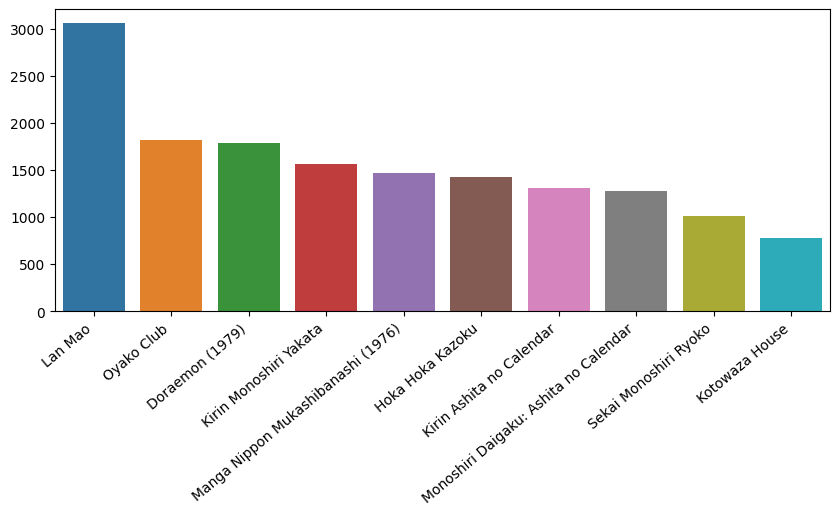

In [32]:
eda['Episodes'] = eda['Episodes'].replace('Unknown', 0).astype(str).astype(int)
epi = eda[['Name','Episodes']].sort_values(by = 'Episodes',ascending =False).head(10)
plt.figure(figsize=(10,4), dpi = 100)
sns.barplot(x=epi['Name'].unique(),y=epi['Episodes'].unique(), data=epi)
plt.xticks(rotation=40, ha = 'right')
plt.show()

In [33]:
anime_info['Studios'] = anime_info['Studios'].replace('Unknown', 0)
stu = anime_info['Studios'].value_counts().reset_index()
stu.rename(columns={"index": "Studio", "Studios": "No of animes"})
stu = stu.drop(0).head(10)

*  #### Here we have categorized animes based on their Production Studio and displayed there count

In [34]:
labels = stu['index'].unique()
values = stu['Studios'].unique()
colors = ['f72585','b5179e','7209b7','560bad','480ca8','3a0ca3','3f37c9','4361ee','4895ef','4cc9f0']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)],layout=go.Layout(height=600, width=800))
fig.update_traces(hole = .4,hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Anime Production by Studio",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

* #### Here we have displayed the Genre Cloud of Animes

In [35]:
# nonull_anime=anime_fulldata.copy()
# nonull_anime.dropna(inplace=True)
# from collections import defaultdict

# all_genres = defaultdict(int)

# for genres in nonull_anime['Genres']:
#     for genre in genres.split(','):
#         all_genres[genre.strip()] += 1
        
# from wordcloud import WordCloud

# genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
# plt.imshow(genres_cloud, interpolation='bilinear')
# plt.axis('off')

#### As the above code consumes too much Memory ,So we have uploaded the image of the result by running it in a new notebook

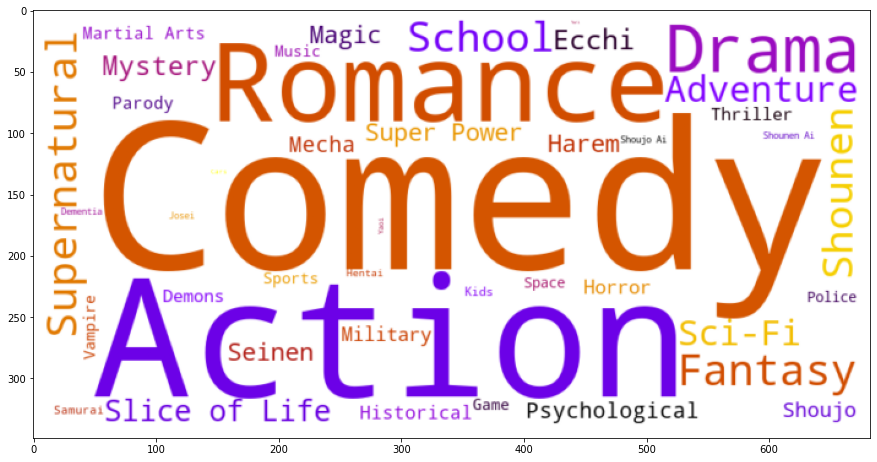

In [36]:
import matplotlib.image as mpimg


img = mpimg.imread('../input/wordcloud-output/__results___29_1.png')
plt.figure(figsize= (15,10))
plt.imshow(img)


#### We can see there are many Comedy genre anime's followd by action, romance,drama in our dataset